import pandas as pd
import numpy as np
import scipy.sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds

In [306]:
import pandas as pd
import pandas as pd
import numpy as np
import scipy.sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds

In [307]:
df = pd.read_csv('amazon.csv')
df.head().T

,0,1,2,3,4
product_id,B07JW9H4J1,B098NS6PVG,B096MSW6CT,B08HDJ86NZ,B08CF3B7N1
product_name,Wayona Nylon Braided USB to Lightning Fast Cha...,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Sounce Fast Phone Charging Cable & Data Sync U...,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Portronics Konnect L 1.2M Fast Charging 3A 8 P...
category,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...
discounted_price,₹399,₹199,₹199,₹329,₹154
actual_price,"₹1,099",₹349,"₹1,899",₹699,₹399
discount_percentage,64%,43%,90%,53%,61%
rating,4.2,4.0,3.9,4.2,4.2
rating_count,"24,269","43,994","7,928","94,363","16,905"
about_product,High Compatibility : Compatible With iPhone 12...,"Compatible with all Type C enabled devices, be...",【 Fast Charger& Data Sync】-With built-in safet...,The boAt Deuce USB 300 2 in 1 cable is compati...,[CHARGE & SYNC FUNCTION]- This cable comes wit...
user_id,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [309]:
df.describe().T

,count,unique,top,freq
product_id,1465,1351,B07JW9H4J1,3
product_name,1465,1337,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
category,1465,211,Computers&Accessories|Accessories&Peripherals|...,233
discounted_price,1465,550,₹199,53
actual_price,1465,449,₹999,120
discount_percentage,1465,92,50%,56
rating,1465,28,4.1,244
rating_count,1463,1143,"9,378",9
about_product,1465,1293,[CHARGE & SYNC FUNCTION]- This cable comes wit...,6
user_id,1465,1194,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10


In [310]:
df[df.rating_count.isna()].T

,282,324
product_id,B0B94JPY2N,B0BQRJ3C47
product_name,Amazon Brand - Solimo 65W Fast Charging Braide...,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple..."
category,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...
discounted_price,₹199,₹249
actual_price,₹999,₹999
discount_percentage,80%,75%
rating,3.0,5.0
rating_count,NaN,NaN
about_product,USB C to C Cable: This cable has type C connec...,💎[The Fastest Charge] - This iPhone USB C cabl...
user_id,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ


In [311]:
df.discounted_price = df.discounted_price.str.replace('₹', '')
df.discounted_price = df.discounted_price.str.replace(',','')
df.actual_price = df.actual_price.str.replace('₹', '')
df.actual_price	= df.actual_price.str.replace(',','')
df.rating_count	= df.rating_count.str.replace(',','')
df.discount_percentage = df.discount_percentage.str.replace('%','')
df.loc[:,['discounted_price','actual_price','discount_percentage']]

,discounted_price,actual_price,discount_percentage
0,399,1099,64
1,199,349,43
2,199,1899,90
3,329,699,53
4,154,399,61
...,...,...,...
1460,379,919,59
1461,2280,3045,25
1462,2219,3080,28
1463,1399,1890,26


In [312]:
cols_to_numeric = ['discounted_price','actual_price','discount_percentage','rating','rating_count']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [313]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,47.691468,4.096585,18295.541353
std,6944.304394,10874.826864,21.635905,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1186.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17336.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [314]:
anomal = df['rating_count'].quantile(0.75)+1.5*(df['rating_count'].quantile(0.75)-df['rating_count'].quantile(0.25))
df = df.loc[df['rating_count']<anomal]


In [315]:
df.boxplot(figsize=(15,15))

<Axes: >

In [316]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1322.000000,1322.000000,1322.000000,1321.000000,1322.000000
mean,3217.927708,5604.839092,47.446293,4.089326,8133.996974
std,7150.334298,11228.557248,21.973363,0.296852,9418.548171
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,309.250000,800.000000,31.000000,3.900000,1018.000000
50%,799.000000,1670.000000,50.000000,4.100000,4020.000000
75%,2091.250000,4383.240000,63.000000,4.300000,12796.000000
max,77990.000000,139900.000000,94.000000,5.000000,41398.000000


In [317]:
df['rating_count'].fillna(df['rating_count'].mean(),inplace=True)
df['rating'].fillna(df['rating'].mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1322 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1322 non-null   object 
 1   product_name         1322 non-null   object 
 2   category             1322 non-null   object 
 3   discounted_price     1322 non-null   float64
 4   actual_price         1322 non-null   float64
 5   discount_percentage  1322 non-null   int64  
 6   rating               1322 non-null   float64
 7   rating_count         1322 non-null   float64
 8   about_product        1322 non-null   object 
 9   user_id              1322 non-null   object 
 10  user_name            1322 non-null   object 
 11  review_id            1322 non-null   object 
 12  review_title         1322 non-null   object 
 13  review_content       1322 non-null   object 
 14  img_link             1322 non-null   object 
 15  product_link         1322 non-null   object

C:\Users\gavri\AppData\Local\Temp\ipykernel_14368\841931656.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating_count'].fillna(df['rating_count'].mean(),inplace=True)
C:\Users\gavri\AppData\Local\Temp\ipykernel_14368\841931656.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [318]:
df.duplicated().sum()

0

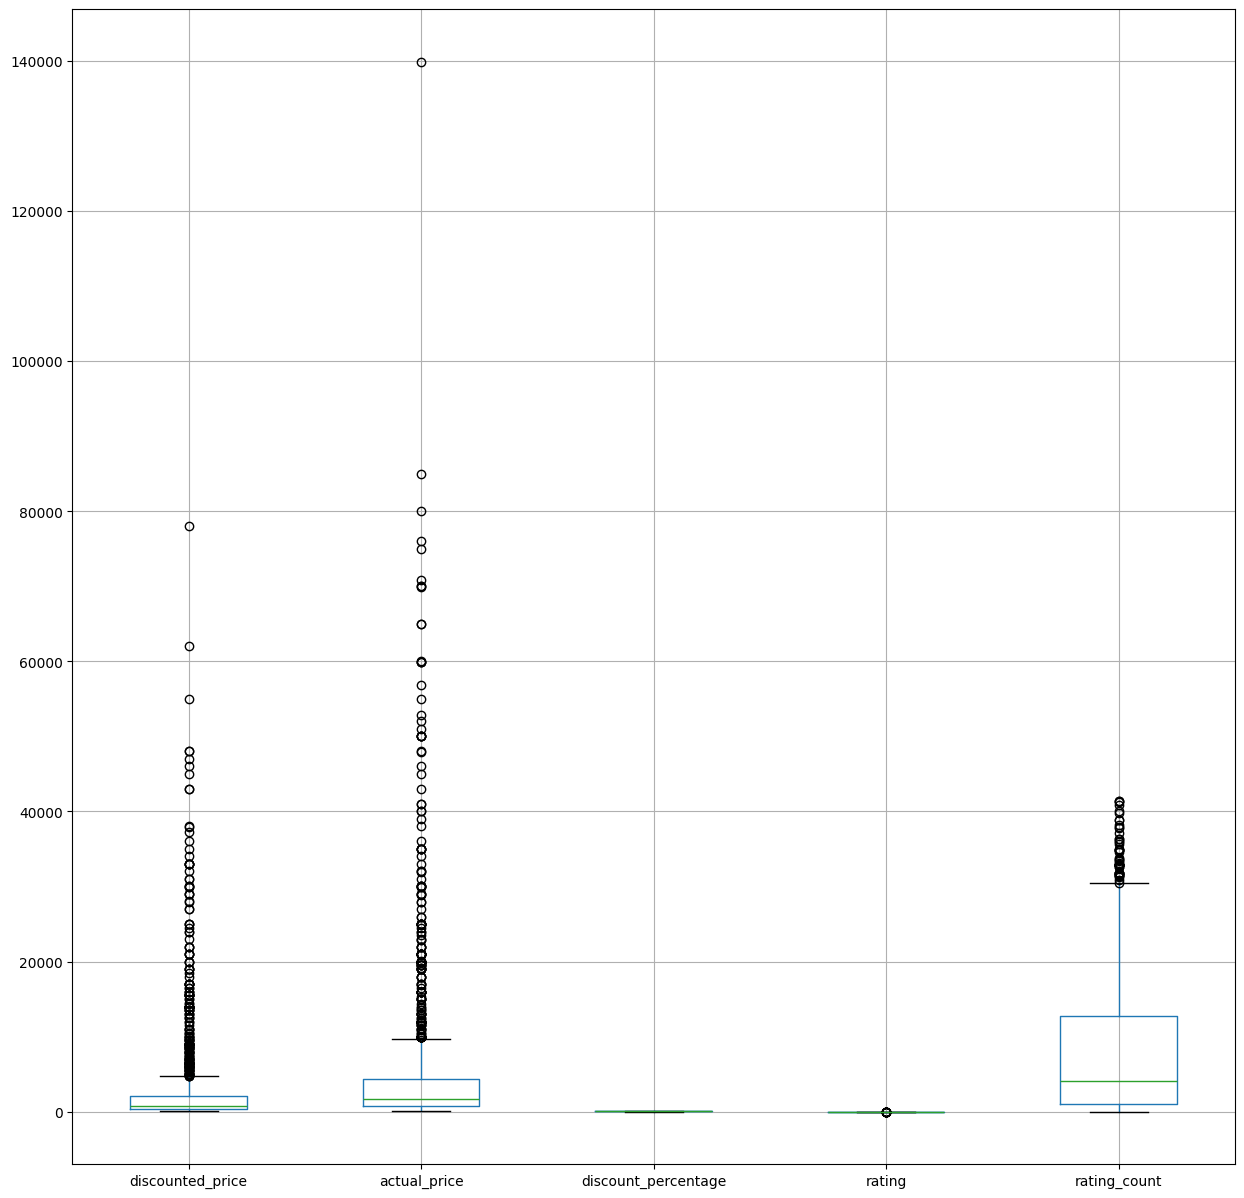

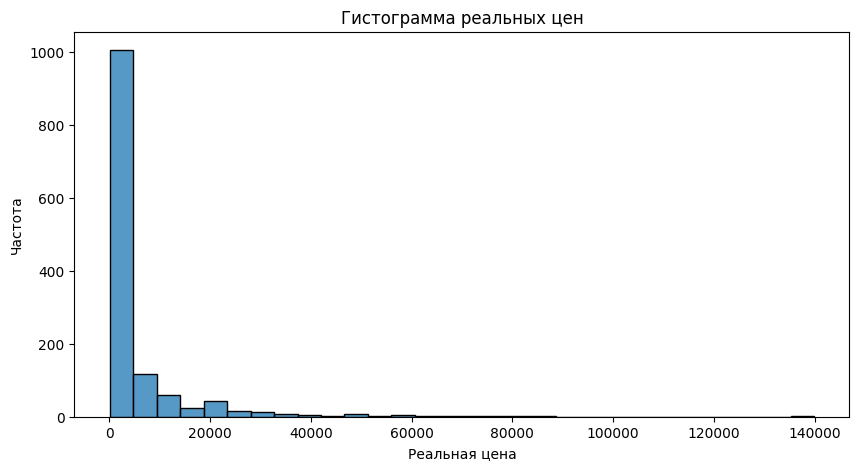

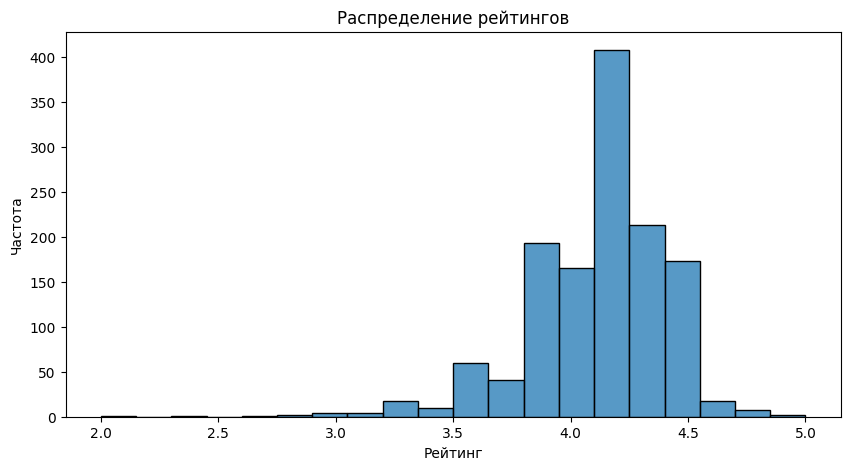

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма цен
plt.figure(figsize=(10, 5))
sns.histplot(df['actual_price'], bins=30)
plt.title('Гистограмма реальных цен')
plt.xlabel('Реальная цена')
plt.ylabel('Частота')
plt.show()

# График распределения рейтингов
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], bins=20)
plt.title('Распределение рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.show()


Пример гипотезы: "Есть ли разница в рейтинге продукции в зависимости от категории?"

In [320]:
# Проверка гипотезы с помощью ANOVA
from scipy.stats import f_oneway

categories = df['category'].unique()
ratings = [df[df['category'] == category]['rating'] for category in categories]
f_stat, p_value = f_oneway(*ratings)

print(f'F-statistic: {f_stat}, p-value: {p_value}')


F-statistic: 2.473416532261935, p-value: 4.6176117122595844e-21


Проверим, влияет ли размер скидки на рейтинг товара. 

In [321]:
from scipy.stats import pearsonr

# *ВЫЧИСЛЕНИЕ КОРРЕЛЯЦИИ*
correlation = pearsonr(df['discounted_price'], df['rating'])
print(f'Коэффициент корреляции: {correlation[0]}, p-value: {correlation[1]}')

Коэффициент корреляции: 0.1304052831478591, p-value: 1.962096143955179e-06


Исходя из полученых данных Коэффициент корреляции мал , а p-value большое , отклоняем нулевую гипотезу, размер скидки не влияет на рейтинг товара.

In [322]:
n_users = df['user_id'].nunique()
n_products = df['product_id'].nunique()
(n_users, n_products)

(1101, 1227)

In [323]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000
mean,3217.927708,5604.839092,47.446293,4.089326,8133.996974
std,7150.334298,11228.557248,21.973363,0.296739,9418.548171
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,309.250000,800.000000,31.000000,3.900000,1018.000000
50%,799.000000,1670.000000,50.000000,4.100000,4020.000000
75%,2091.250000,4383.240000,63.000000,4.300000,12796.000000
max,77990.000000,139900.000000,94.000000,5.000000,41398.000000


In [324]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.00,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.00,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,149.00,1000.0,85,3.9,24871.0,Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,65,4.1,15188.0,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/boAt-Micro-USB-Tangle-Fr...


In [325]:
%%time
n_users_values = df['user_id'].unique()

df['user_id'] = df['user_id'].apply(lambda f: np.where(n_users_values == f)[0][0])

CPU times: total: 46.9 ms
Wall time: 47 ms


In [326]:
%%time
n_products_values = df['product_id'].unique()

df['product_id'] = df['product_id'].apply(lambda f: np.where(n_products_values == f)[0][0])

CPU times: total: 46.9 ms
Wall time: 50 ms


In [327]:
df[:10].T

,0,2,4,5,6,7,10,13,14,15
product_id,0,1,2,3,4,5,6,7,8,9
product_name,Wayona Nylon Braided USB to Lightning Fast Cha...,Sounce Fast Phone Charging Cable & Data Sync U...,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,pTron Solero TB301 3A Type-C Data and Fast Cha...,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",MI Usb Type-C Cable Smartphone (Black),Portronics Konnect L POR-1081 Fast Charging 3A...,Portronics Konnect CL 20W POR-1067 Type-C to 8...,Portronics Konnect L 1.2M POR-1401 Fast Chargi...,MI Braided USB Type-C Cable for Charging Adapt...
category,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...
discounted_price,399.0,199.0,154.0,149.0,176.63,229.0,154.0,350.0,159.0,349.0
actual_price,1099.0,1899.0,399.0,1000.0,499.0,299.0,339.0,899.0,399.0,399.0
discount_percentage,64,90,61,85,65,23,55,61,60,13
rating,4.2,3.9,4.2,3.9,4.1,4.3,4.3,4.2,4.1,4.4
rating_count,24269.0,7928.0,16905.0,24871.0,15188.0,30411.0,13391.0,2262.0,4768.0,18757.0
about_product,High Compatibility : Compatible With iPhone 12...,【 Fast Charger& Data Sync】-With built-in safet...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,Fast Charging & Data Sync: Solero TB301 Type-C...,It Ensures High Speed Transmission And Chargin...,1m long Type-C USB Cable|Sturdy and Durable. W...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,[20W PD FAST CHARGING]-It’s supports 20W PD qu...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,1M Long Cable. Usb 2.0 (Type A)|Toughened Join...
user_id,0,1,2,3,4,5,6,7,8,9


In [328]:
df.shape


(1322, 16)

In [329]:
unique_products = df[['product_id', 'product_name', 'category','about_product','img_link','product_link']].drop_duplicates()

In [330]:
unique_products.shape

(1322, 6)

In [331]:
unique_products.head().T

,0,2,4,5,6
product_id,0,1,2,3,4
product_name,Wayona Nylon Braided USB to Lightning Fast Cha...,Sounce Fast Phone Charging Cable & Data Sync U...,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,pTron Solero TB301 3A Type-C Data and Fast Cha...,"boAt Micro USB 55 Tangle-free, Sturdy Micro US..."
category,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...
about_product,High Compatibility : Compatible With iPhone 12...,【 Fast Charger& Data Sync】-With built-in safet...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,Fast Charging & Data Sync: Solero TB301 Type-C...,It Ensures High Speed Transmission And Chargin...
img_link,https://m.media-amazon.com/images/W/WEBP_40237...,https://m.media-amazon.com/images/W/WEBP_40237...,https://m.media-amazon.com/images/W/WEBP_40237...,https://m.media-amazon.com/images/I/31wOPjcSxl...,https://m.media-amazon.com/images/W/WEBP_40237...
product_link,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,https://www.amazon.in/Sounce-iPhone-Charging-C...,https://www.amazon.in/Portronics-Konnect-POR-1...,https://www.amazon.in/Solero-TB301-Charging-48...,https://www.amazon.in/boAt-Micro-USB-Tangle-Fr...


In [332]:
unique_products['category'] = unique_products['category'].apply(lambda x: ' '.join(x.split('|')))

In [333]:
unique_products['img_link'] = unique_products['img_link'].apply(lambda x: ' '.join(x.split('/')))

In [334]:
unique_products['product_link'] = unique_products['product_link'].apply(lambda x: ' '.join(x.split('/')))

In [335]:
unique_products.head().T

,0,2,4,5,6
product_id,0,1,2,3,4
product_name,Wayona Nylon Braided USB to Lightning Fast Cha...,Sounce Fast Phone Charging Cable & Data Sync U...,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,pTron Solero TB301 3A Type-C Data and Fast Cha...,"boAt Micro USB 55 Tangle-free, Sturdy Micro US..."
category,Computers&Accessories Accessories&Peripherals ...,Computers&Accessories Accessories&Peripherals ...,Computers&Accessories Accessories&Peripherals ...,Computers&Accessories Accessories&Peripherals ...,Computers&Accessories Accessories&Peripherals ...
about_product,High Compatibility : Compatible With iPhone 12...,【 Fast Charger& Data Sync】-With built-in safet...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,Fast Charging & Data Sync: Solero TB301 Type-C...,It Ensures High Speed Transmission And Chargin...
img_link,https: m.media-amazon.com images W WEBP_40237...,https: m.media-amazon.com images W WEBP_40237...,https: m.media-amazon.com images W WEBP_40237...,https: m.media-amazon.com images I 31wOPjcSxl...,https: m.media-amazon.com images W WEBP_40237...
product_link,https: www.amazon.in Wayona-Braided-WN3LG1-Sy...,https: www.amazon.in Sounce-iPhone-Charging-C...,https: www.amazon.in Portronics-Konnect-POR-1...,https: www.amazon.in Solero-TB301-Charging-48...,https: www.amazon.in boAt-Micro-USB-Tangle-Fr...


In [336]:
unique_products['text_feature'] = unique_products.apply(lambda x: ' '.join([x['product_name'].lower(),\
                                                                            x['category'].lower(),\
                                                                            x['about_product'].lower(),\
                                                                            x['img_link'].lower(),\
                                                                            x['product_link'].lower()]), axis = 1)

In [337]:
unique_products.head()

,product_id,product_name,category,about_product,img_link,product_link,text_feature
0,0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories Accessories&Peripherals ...,High Compatibility : Compatible With iPhone 12...,https: m.media-amazon.com images W WEBP_40237...,https: www.amazon.in Wayona-Braided-WN3LG1-Sy...,wayona nylon braided usb to lightning fast cha...
2,1,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories Accessories&Peripherals ...,【 Fast Charger& Data Sync】-With built-in safet...,https: m.media-amazon.com images W WEBP_40237...,https: www.amazon.in Sounce-iPhone-Charging-C...,sounce fast phone charging cable & data sync u...
4,2,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories Accessories&Peripherals ...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https: m.media-amazon.com images W WEBP_40237...,https: www.amazon.in Portronics-Konnect-POR-1...,portronics konnect l 1.2m fast charging 3a 8 p...
5,3,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories Accessories&Peripherals ...,Fast Charging & Data Sync: Solero TB301 Type-C...,https: m.media-amazon.com images I 31wOPjcSxl...,https: www.amazon.in Solero-TB301-Charging-48...,ptron solero tb301 3a type-c data and fast cha...
6,4,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories Accessories&Peripherals ...,It Ensures High Speed Transmission And Chargin...,https: m.media-amazon.com images W WEBP_40237...,https: www.amazon.in boAt-Micro-USB-Tangle-Fr...,"boat micro usb 55 tangle-free, sturdy micro us..."


In [338]:
vectorizer = TfidfVectorizer()

In [339]:
tfidf_features = vectorizer.fit_transform(unique_products['text_feature']).toarray()

In [340]:
tfidf_features.shape

(1322, 13838)

In [341]:
pd.DataFrame(tfidf_features)

,0,1,2,3,4,5,6,7,8,9,...,13828,13829,13830,13831,13832,13833,13834,13835,13836,13837
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.068236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.065205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1318,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1319,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1320,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [342]:
vectorizer.vocabulary_

{'wayona': 13483,
 'nylon': 9634,
 'braided': 5117,
 'usb': 13180,
 'to': 12841,
 'lightning': 8744,
 'fast': 7032,
 'charging': 5479,
 'and': 3336,
 'data': 6160,
 'sync': 12551,
 'cable': 5270,
 'compatible': 5761,
 'for': 7247,
 'iphone': 8307,
 '13': 248,
 '12': 190,
 '11': 158,
 'ipad': 8301,
 'air': 3222,
 'pro': 10330,
 'mini': 9225,
 'ft': 7336,
 'pack': 9855,
 'of': 9666,
 'grey': 7621,
 'computers': 5790,
 'accessories': 3080,
 'peripherals': 10009,
 'cables': 5273,
 'usbcables': 13186,
 'high': 7852,
 'compatibility': 5759,
 'with': 13629,
 'xsmax': 13746,
 'xr': 13743,
 'plus': 10150,
 '6s': 2753,
 '5s': 2649,
 '5c': 2618,
 'se': 11184,
 'ipod': 8311,
 'nano7': 9471,
 'touch': 12882,
 'more': 9344,
 'apple': 3389,
 'devices': 6302,
 'charge': 5471,
 'it': 8346,
 'can': 5319,
 'simultaneously': 11407,
 'at': 3491,
 'rapid': 10571,
 'speed': 11646,
 'any': 3368,
 'adaptor': 3139,
 'multi': 9419,
 'port': 10200,
 'station': 12286,
 'or': 9752,
 'power': 10238,
 'bank': 4847,
 

In [343]:
[u for u, v in vectorizer.vocabulary_.items() if v == 13483]

['wayona']

# Косинусное расстояние

Рассмотрим функцию для попарных косинусных расстояния массива

Сosine_distances - это единица минус косинус, такая величина берется для того, чтобы выполнялась логика - чем меньше значение тем ближе
вектора

Вычислим расстояния

In [344]:
cosine_similarity = cosine_distances(tfidf_features)

In [345]:
cosine_similarity.shape

(1322, 1322)

In [346]:
cosine_similarity[0].argsort()

array([   0,  530,  332, ..., 1318, 1198,  782], dtype=int64)

Зная попарные косинусные расстояния, найдем топ 5 кандидатов для рекомендаций

In [347]:
top=5
products_sim = []
for i in range(len(cosine_similarity)):
    neighbors = (cosine_similarity[i]).argsort()[1:top+1] # считаем от 1 до top1 + 1, 
    # так как ближайшее расстояние у вектора до самого себя
products_sim.append(neighbors)
products_sim = np.array(products_sim)

In [348]:
products_sim.shape

(1, 5)

In [349]:
product_id_name = dict(unique_products.set_index('product_id')['text_feature'])
print("Keys in product_id_name:", product_id_name.keys())
   

Keys in product_id_name: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,

In [350]:
product_id_name = dict(unique_products.set_index('product_id')['text_feature'])
product_top_df = pd.DataFrame(products_sim, columns = ['top1', 'top2', 'top3', 'top4', 'top5'])
product_top_df['top1'] = product_top_df['top1'].apply(lambda x: product_id_name[x] if x in product_id_name else None)
product_top_df['top2'] = product_top_df['top2'].apply(lambda x: product_id_name[x] if x in product_id_name else None)
product_top_df['top3'] = product_top_df['top3'].apply(lambda x: product_id_name[x] if x in product_id_name else None)
product_top_df['top4'] = product_top_df['top4'].apply(lambda x: product_id_name[x] if x in product_id_name else None)
product_top_df['top5'] = product_top_df['top5'].apply(lambda x: product_id_name[x] if x in product_id_name else None)

product_top_df['product_id'] = product_top_df.index

In [352]:
product_recs = (
    unique_products.merge(
       product_top_df,
        left_on='product_id', right_on='product_id'
    )
)

In [354]:
product_recs[:5].T

,0,1,2
product_id,0,0,0
product_name,Wayona Nylon Braided USB to Lightning Fast Cha...,Wayona Nylon Braided USB to Lightning Fast Cha...,Wayona Nylon Braided USB to Lightning Fast Cha...
category,Computers&Accessories Accessories&Peripherals ...,Computers&Accessories Accessories&Peripherals ...,Computers&Accessories Accessories&Peripherals ...
about_product,High Compatibility : Compatible With iPhone 12...,High Compatibility : Compatible With iPhone 12...,High Compatibility : Compatible With iPhone 12...
img_link,https: m.media-amazon.com images W WEBP_40237...,https: m.media-amazon.com images I 51UsScvHQN...,https: m.media-amazon.com images W WEBP_40237...
product_link,https: www.amazon.in Wayona-Braided-WN3LG1-Sy...,https: www.amazon.in Wayona-Braided-WN3LG1-Sy...,https: www.amazon.in Wayona-Braided-WN3LG1-Sy...
text_feature,wayona nylon braided usb to lightning fast cha...,wayona nylon braided usb to lightning fast cha...,wayona nylon braided usb to lightning fast cha...
top1,None,None,None
top2,orient electric aura neo instant 3l water heat...,orient electric aura neo instant 3l water heat...,orient electric aura neo instant 3l water heat...
top3,zigma winotek winotek sun instant water geyser...,zigma winotek winotek sun instant water geyser...,zigma winotek winotek sun instant water geyser...
